In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load cleaned data
df = pd.read_csv("../data/processed_data/cleaned_data.csv")

# Parse Date column
df['Date'] = pd.to_datetime(df['Date'])

# Check structure
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64


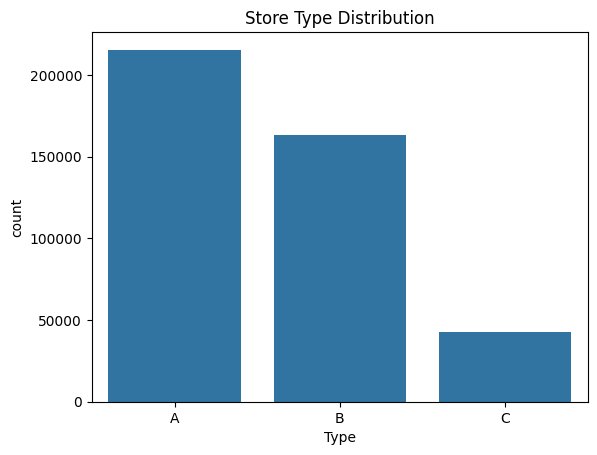

Unique departments: 81


In [3]:
# Holiday distribution
print(df['IsHoliday_x'].value_counts())

# Store types
sns.countplot(data=df, x='Type')
plt.title("Store Type Distribution")
plt.show()

# Department count
print("Unique departments:", df['Dept'].nunique())


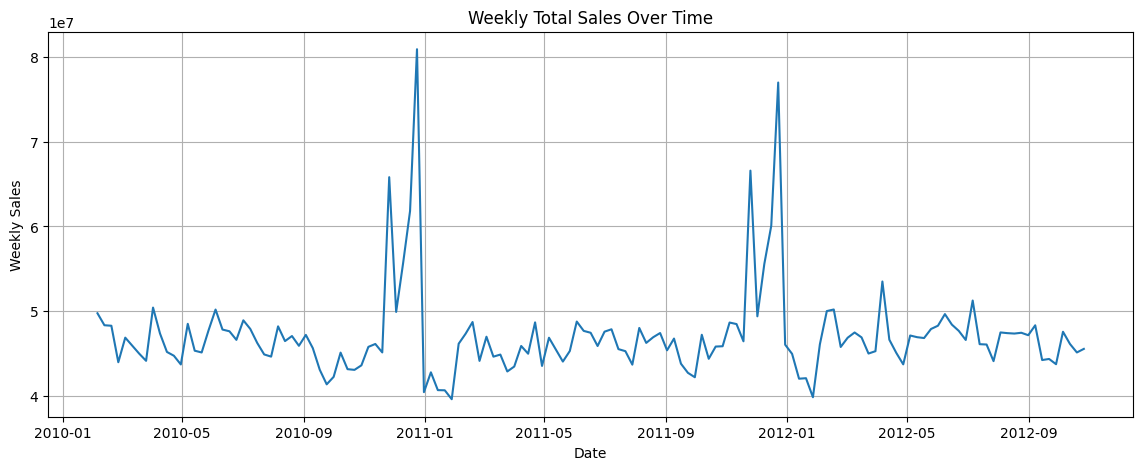

In [4]:
# Aggregate weekly sales over time
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])
plt.title("Weekly Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


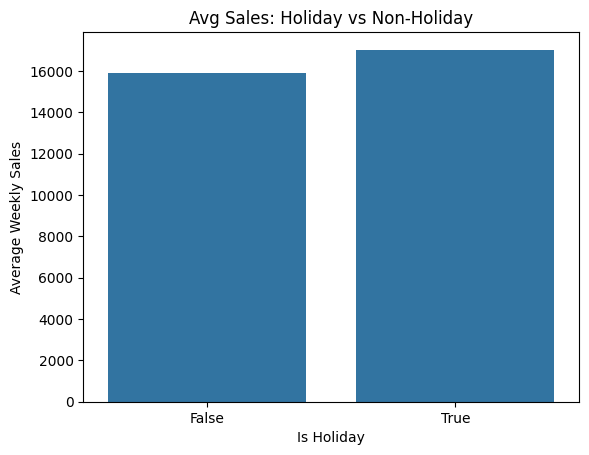

In [ ]:
#Compare Sales — Holiday vs Non-Holiday
holiday_sales = df.groupby("IsHoliday_x")["Weekly_Sales"].mean().reset_index()
sns.barplot(x="IsHoliday_x", y="Weekly_Sales", data=holiday_sales)
plt.title("Avg Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday")
plt.ylabel("Average Weekly Sales")
plt.show()


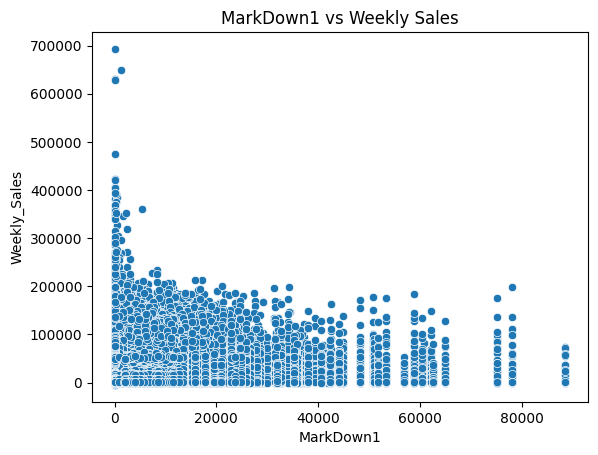

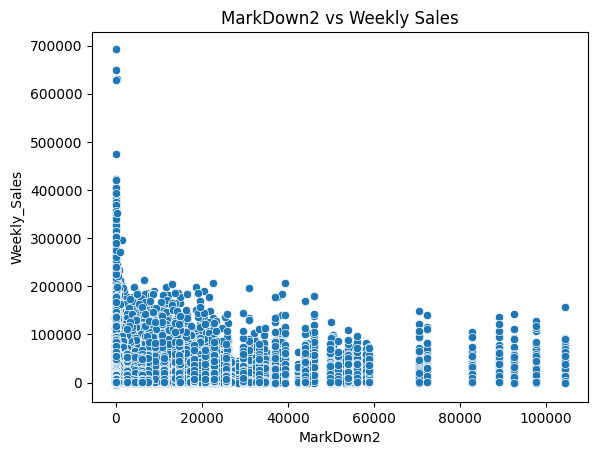

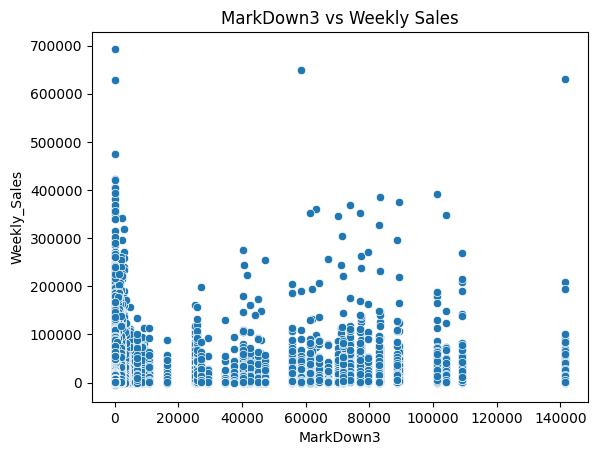

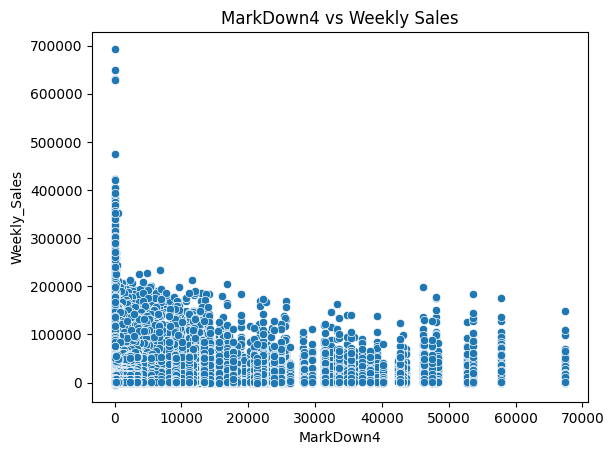

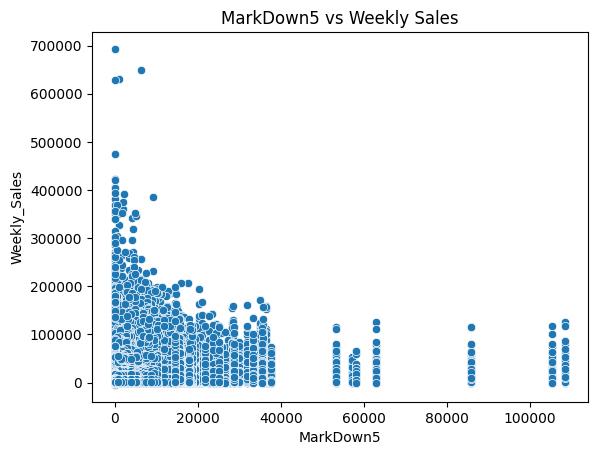

In [ ]:
#Markdown Impact Analysis
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    sns.scatterplot(data=df, x=col, y="Weekly_Sales")
    plt.title(f"{col} vs Weekly Sales")
    plt.show()


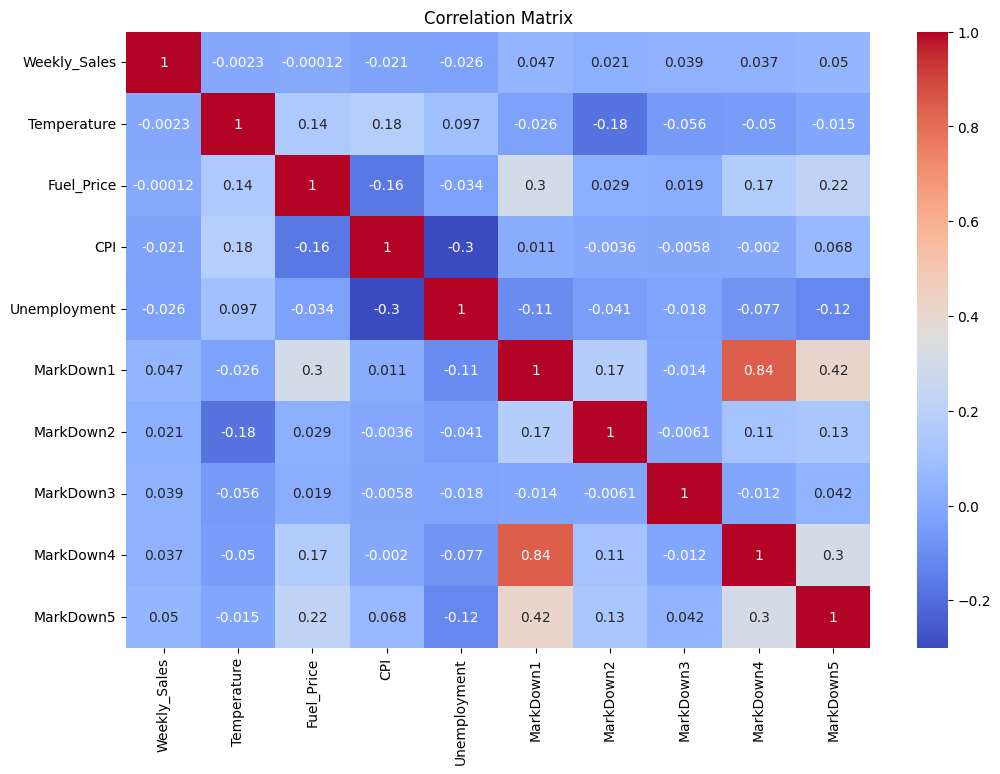

In [ ]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] + markdown_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


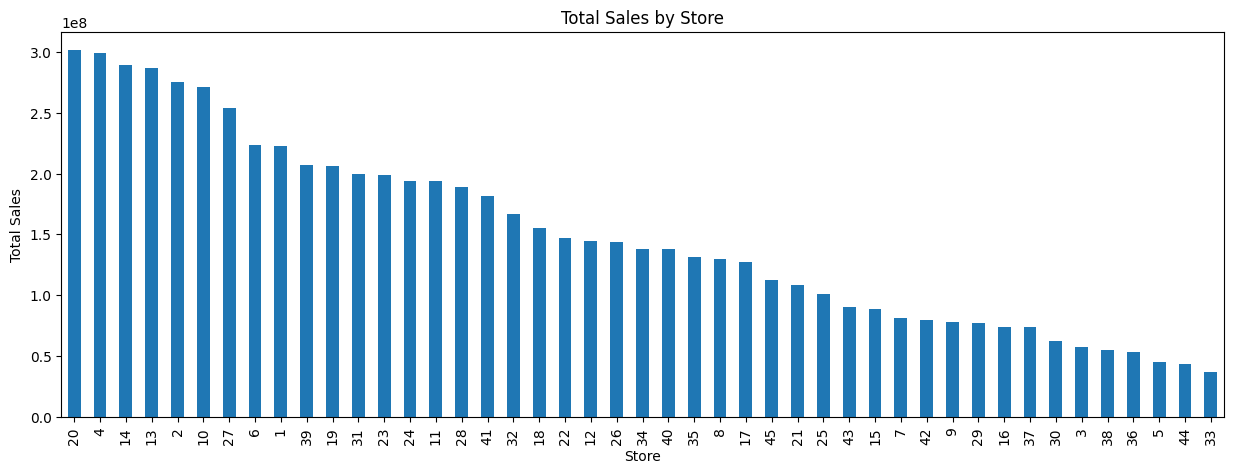

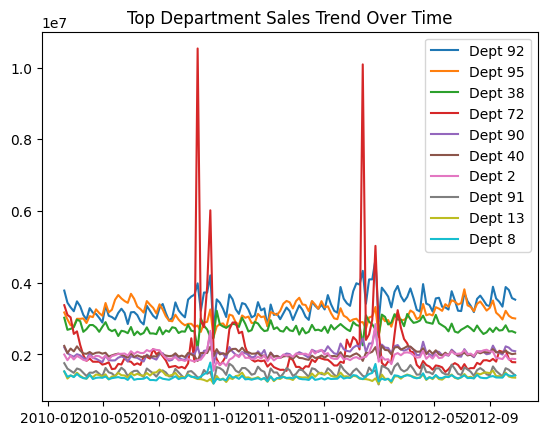

In [ ]:
# Store-wise and Department-wise Sales
#Total Sales by Store
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
store_sales.plot(kind="bar", figsize=(15, 5), title="Total Sales by Store")
plt.ylabel("Total Sales")
plt.show()

# Department Sales Trend
top_departments = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False).head(10).index

for dept in top_departments:
    dept_data = df[df["Dept"] == dept]
    dept_weekly = dept_data.groupby("Date")["Weekly_Sales"].sum()
    plt.plot(dept_weekly, label=f"Dept {dept}")

plt.title("Top Department Sales Trend Over Time")
plt.legend()
plt.show()
